In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

dataset = pd.read_csv("dataset.csv")

In [194]:
dataset["creatinine"].fillna(dataset["creatinine"].mean(),inplace = True)
dataset["po2"].fillna(dataset["po2"].mean(),inplace = True)
dataset["fio2"].fillna(dataset["fio2"].mean(),inplace = True)
dataset["pco2"].fillna(dataset["pco2"].mean(),inplace = True)
dataset["bp_min"].fillna(dataset["bp_min"].mean(),inplace = True)
dataset["bp_max"].fillna(dataset["bp_max"].mean(),inplace = True)
dataset["pain"].fillna(dataset["pain"].mean(),inplace = True)
dataset["k"].fillna(dataset["k"].mean(),inplace = True)
dataset["hr_min"].fillna(dataset["hr_min"].mean(),inplace = True)
dataset["hr_max"].fillna(dataset['hr_max'].mean(),inplace = True)
dataset["gcs_min"].fillna(dataset["gcs_min"].mean(),inplace = True)
dataset["gcs_max"].fillna(dataset["gcs_max"].mean(),inplace = True)
dataset["bun"].fillna(dataset["bun"].mean(),inplace = True)
dataset["hco3"].fillna(dataset["hco3"].mean(),inplace = True)
dataset["airway"].fillna(dataset["airway"].mean(),inplace = True)
dataset["resp_min"].fillna(dataset["resp_min"].mean(),inplace = True)
dataset["resp_max"].fillna(dataset["resp_max"].mean(),inplace = True)
dataset["haemoglobin"].fillna(dataset["haemoglobin"].mean(),inplace = True)
dataset["spo2_min"].fillna(dataset["spo2_min"].mean(),inplace = True)
dataset["spo2_max"].fillna(dataset["spo2_max"].mean(),inplace = True)
dataset["temp_min"].fillna(dataset["temp_min"].mean(),inplace = True)
dataset["temp_max"].fillna(dataset["temp_max"].mean(),inplace = True)
dataset["na"].fillna(dataset["na"].mean(),inplace = True)


In [195]:
features = ['creatinine','po2','fio2','pco2','bp_min','bp_max','pain','k','hr_min','hr_max','gcs_min','gcs_max','bun','hco3','airway','resp_min','resp_max','haemoglobin','spo2_min','spo2_max','temp_min','temp_max','na']

x = dataset[features]
y= dataset['outcome']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [196]:
import math
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [197]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=100, cv=3, verbose=2, random_state=0)
rf_random.fit(xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.3s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.3s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total=   3.8s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min

[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False, total=   7.2s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, total=   5.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, total=   5.7s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=True, total=   5.5s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimator

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   0.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   0.8s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   3.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=800, min_

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=   3.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=70, bootstrap=True, total=   2.9s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   5.9s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   6.2s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=2000, min

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=False, total=   4.6s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   3.6s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   3.9s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   3.9s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV] 

[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   1.5s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   1.5s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   1.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False, total=   2.2s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=600, min_sampl

[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   7.5s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=False, total=   7.1s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   5.0s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   4.9s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_e

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, total=   1.3s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=   4.7s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=   4.6s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=   4.5s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=16

[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=   5.2s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=   5.2s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=   5.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True, total=   3.1s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=110, bootstrap=True 
[CV]  n_estimator

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 17.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [198]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [205]:
rf0=RandomForestClassifier(n_estimators=800,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=110,bootstrap=True,oob_score=True,random_state=0)
rf0.fit(xtrain,ytrain)
print(rf0.oob_score_)
y_pred0 = rf0.predict(xtest)
print( "AUC Score: %f" % metrics.roc_auc_score(ytest, y_pred0))

0.7943127962085308
AUC Score (Train): 0.893482


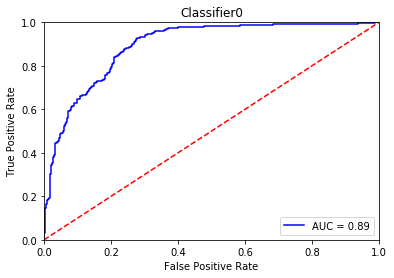

In [236]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr, tpr, threshold = metrics.roc_curve(ytest, y_pred0)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier0')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [199]:
from sklearn.model_selection import GridSearchCV

param_grid1 = {
    'bootstrap': [True],
    'max_depth': [100,110,120],
    'max_features': ['sqrt'],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[5,10,15],
    'n_estimators':[700,800,900]
}

rf1 = RandomForestClassifier(oob_score=True,random_state=0)
rf1.fit(xtrain,ytrain)
print(rf1.oob_score_)

grid_search1 = GridSearchCV(estimator=rf1, param_grid=param_grid1, cv=3, verbose=2)

0.7933649289099526


In [200]:
grid_search1.fit(xtrain,ytrain)
grid_search1.best_params_
grid_search1.best_score_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=   2.4s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=   2.3s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=700, total=   2.2s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   2.8s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   2.9s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900, total=   3.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=   2.3s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=   2.2s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700, total=   2.2s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True,

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=900, total=   3.0s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=900 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=900, total=   2.7s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=900 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=900, total=   2.7s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=700 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=700, total=   2.1s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=700 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800, total=   2.5s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=800, total=   2.4s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=   2.8s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=   2.7s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=700, total=   2.1s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800, total=   2.4s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800, total=   2.4s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800, total=   2.4s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=900 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700, total=   2.5s
[CV] bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700 
[CV]  bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700, total=   2.5s
[CV] bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700 
[CV]  bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700, total=   2.5s
[CV] bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   2.9s
[CV] bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900, total=   2.9s
[CV] bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900 
[CV]  bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900, total=   3.0s
[CV] bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700 
[CV]  bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700, total=   2.3s
[CV] bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700 
[CV]  bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700, total=   2.1s
[CV] bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=800, total=   2.3s
[CV] bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=900 
[CV]  bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=900, total=   2.9s
[CV] bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=900 
[CV]  bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=900, total=   2.9s
[CV] bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=900 
[CV]  bootstrap=True, max_depth=120, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=900, total=   2.6s


[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed: 10.3min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 900}

In [206]:
rf2 = RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_leaf=2, min_samples_split=10, n_estimators=900, oob_score=True, random_state=0)
rf2.fit(xtrain,ytrain)
print(rf2.oob_score_)
y_pred2 = rf2.predict(xtest)
print( "AUC Score: %f" % metrics.roc_auc_score(ytest, y_pred2))

0.7946287519747235
AUC Score (Train): 0.893603


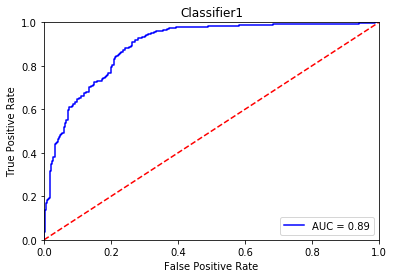

In [238]:
fpr, tpr, threshold = metrics.roc_curve(ytest, y_pred2)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier1')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [241]:
param_grid2 = {
    'bootstrap': [True],
    'max_depth': [90,100,110],
    'max_features': ['sqrt'],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[5,10,15],
    'n_estimators':[800,900,1000]
}
grid_search2=GridSearchCV(estimator=rf1, param_grid=param_grid2,cv=3,verbose=2)
grid_search2.fit(xtrain,ytrain)
grid_search2.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   2.8s
[CV] bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   2.8s
[CV] bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800 
[CV]  bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800, total=   2.7s
[CV] bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900 
[CV]  bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   3.2s
[CV] bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900 
[CV]  bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900, total=   3.1s
[CV] bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900 
[CV]  bootstrap=True, max_depth=90, 

[CV]  bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=   3.2s
[CV] bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800, total=   2.5s
[CV] bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900 
[CV]  bootstrap=True, max_de

[CV]  bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.1s
[CV] bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.0s
[CV] bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=   3.0s
[CV] bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=800 
[CV]  bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=800, total=   2.4s
[CV] bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=800 
[CV]  bootstrap=True, m

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=   2.8s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=900, total=   2.7s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000, total=   3.1s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000, total=   3.1s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=1000 
[CV]  bootstrap

[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=900 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=900, total=   2.9s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=900 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=900, total=   2.8s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=900 
[CV]  bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=900, total=   2.7s
[CV] bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000 
[CV]  bootstrap=True, max_d

[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   2.9s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   3.0s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=800, total=   2.8s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900, total=   3.2s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=900 
[CV]  bootstrap=True

[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   3.2s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000, total=   3.3s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800, total=   2.6s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800 
[CV]  bootstrap=T

[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=900, total=   2.7s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=1000, total=   3.2s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=1000, total=   3.0s
[CV] bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=1000 
[CV]  bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=15, n_estimators=1000, total=   3.1s


[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed: 11.8min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 1000}

In [242]:
grid_search2.best_score_

0.7911532385466035

In [243]:
rf3=RandomForestClassifier(max_depth=90,max_features='sqrt',min_samples_leaf=1,min_samples_split=15,n_estimators=1000,oob_score=True,random_state=0)
rf3.fit(xtrain,ytrain)
print(rf3.oob_score_)
y_pred3 = rf3.predict(xtest)
print( "AUC Score: %f" % metrics.roc_auc_score(ytest, y_pred3))

0.7958925750394945
AUC Score: 0.794751


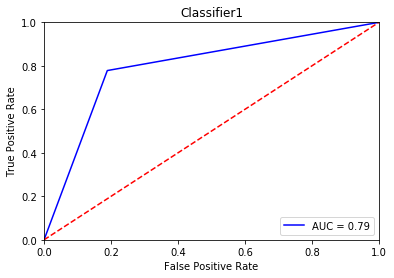

In [244]:
fpr, tpr, threshold = metrics.roc_curve(ytest, y_pred3)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier1')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

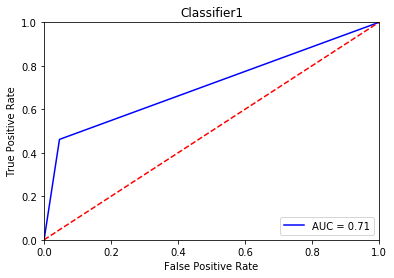

In [245]:
rf4=RandomForestClassifier(max_depth=90,max_features='sqrt',min_samples_leaf=1,min_samples_split=15,n_estimators=1000,oob_score=True,random_state=0)
rf4.fit(xtrain,ytrain)

threshold = 0.7
pred_prob = rf4.predict_proba(xtest)
y_pred4=(pred_prob[:,1]>=threshold).astype('int')

fpr, tpr, threshold = metrics.roc_curve(ytest, y_pred4)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Classifier1')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [246]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision (threshold=0.5):',precision_score(ytest,y_pred3))
print('recall (threshold=0.5)',recall_score(ytest,y_pred3))
print('f1 (threshold=0.5)',f1_score(ytest,y_pred3))

print('precision (threshold=0.7):',precision_score(ytest,y_pred4))
print('recall (threshold=0.7)',recall_score(ytest,y_pred4))
print('f1 (threshold=0.7)',f1_score(ytest,y_pred4))

precision (threshold=0.5): 0.7908847184986595
recall (threshold=0.5) 0.7783641160949868
f1 (threshold=0.5) 0.7845744680851063
precision (threshold=0.7): 0.9020618556701031
recall (threshold=0.7) 0.46174142480211083
f1 (threshold=0.7) 0.6108202443280978
